In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cs-training.csv to cs-training.csv


In [ ]:
credit_risk = pd.read_csv("cs-training.csv", usecols=lambda column: column not in ["Unnamed: 0"])
credit_risk.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
credit_risk = credit_risk.drop_duplicates()

In [ ]:
credit_risk.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
def findmiss (df):
  return round(df.isnull().sum()/df.shape[0]*100,2)

In [ ]:
findmiss(credit_risk)

,0
SeriousDlqin2yrs,0.00
RevolvingUtilizationOfUnsecuredLines,0.00
age,0.00
NumberOfTime30-59DaysPastDueNotWorse,0.00
DebtRatio,0.00
MonthlyIncome,19.56
NumberOfOpenCreditLinesAndLoans,0.00
NumberOfTimes90DaysLate,0.00
NumberRealEstateLoansOrLines,0.00
NumberOfTime60-89DaysPastDueNotWorse,0.00


In [ ]:
credit_risk[credit_risk.MonthlyIncome.isnull()].describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,29221.000000,29221.000000,29221.000000,29221.000000,29221.000000,0.0,29221.000000,29221.000000,29221.000000,29221.000000,25393.000000
mean,0.056603,6.757056,56.395127,0.452483,1702.565005,NaN,7.314192,0.355224,0.886691,0.323398,0.321309
std,0.231087,219.705933,15.293975,5.145292,4279.494336,NaN,4.821894,5.136737,1.036795,5.125615,0.815421
min,0.000000,0.000000,21.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016851,46.000000,0.000000,155.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.081840,57.000000,0.000000,1198.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.428256,67.000000,0.000000,2407.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,109.000000,98.000000,329664.000000,NaN,45.000000,98.000000,23.000000,98.000000,9.000000


In [ ]:
credit_risk['NumberOfDependents'].agg(['mode'])

,mode
0,0.0


In [ ]:
credit_risk.groupby(['NumberOfDependents']).size()

,0
NumberOfDependents,
0.0,86392
1.0,26314
2.0,19521
3.0,9483
4.0,2862
5.0,746
6.0,158
7.0,51
8.0,24


In [ ]:
fam_miss=credit_risk[credit_risk.NumberOfDependents.isnull()]
fam_miss=credit_risk[credit_risk.NumberOfDependents.notnull()]

In [ ]:
fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)

<ipython-input-36-eeda2eaba563>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['NumberOfDependents'] = fam_miss['NumberOfDependents'].fillna(0)
<ipython-input-36-eeda2eaba563>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(0)


In [ ]:
findmiss(fam_miss)

,0
SeriousDlqin2yrs,0.0
RevolvingUtilizationOfUnsecuredLines,0.0
age,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.0
DebtRatio,0.0
MonthlyIncome,0.0
NumberOfOpenCreditLinesAndLoans,0.0
NumberOfTimes90DaysLate,0.0
NumberRealEstateLoansOrLines,0.0
NumberOfTime60-89DaysPastDueNotWorse,0.0


In [ ]:
fam_miss['MonthlyIncome'].agg(['mean','median','min'])

,MonthlyIncome
mean,5510.648716
median,4500.000000
min,0.000000


In [ ]:
fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(fam_miss['MonthlyIncome'].median())

<ipython-input-40-e86fbe6e23b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fam_miss['MonthlyIncome'] = fam_miss['MonthlyIncome'].fillna(fam_miss['MonthlyIncome'].median())


In [ ]:
findmiss(fam_miss)

,0
SeriousDlqin2yrs,0.0
RevolvingUtilizationOfUnsecuredLines,0.0
age,0.0
NumberOfTime30-59DaysPastDueNotWorse,0.0
DebtRatio,0.0
MonthlyIncome,0.0
NumberOfOpenCreditLinesAndLoans,0.0
NumberOfTimes90DaysLate,0.0
NumberRealEstateLoansOrLines,0.0
NumberOfTime60-89DaysPastDueNotWorse,0.0


In [ ]:
filled_train = pd.concat([fam_miss, fam_miss])

In [ ]:
filled_train.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
filled_train.groupby(['SeriousDlqin2yrs']).size()/filled_train.shape[0]

,0
SeriousDlqin2yrs,
0,0.932462
1,0.067538


In [ ]:
filled_train.RevolvingUtilizationOfUnsecuredLines.describe()

,RevolvingUtilizationOfUnsecuredLines
count,291126.000000
mean,5.941378
std,250.510405
min,0.000000
25%,0.031217
50%,0.158817
75%,0.561092
max,50708.000000


In [ ]:
filled_train['RevolvingUtilizationOfUnsecuredLines'].quantile([.95])

,RevolvingUtilizationOfUnsecuredLines
0.95,1.0


In [ ]:
(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10]).describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000
mean,0.074561,3586.371788,50.333333,0.197368,553.571900,6425.030702,5.855263,0.078947,1.223684,0.092105,0.688596
std,0.262971,5223.528972,14.411636,0.593438,1807.108850,6762.287145,3.133810,0.595141,1.072313,0.574421,1.037517
min,0.000000,11.385230,24.000000,0.000000,0.000800,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,891.000000,38.750000,0.000000,0.212568,30.000000,4.000000,0.000000,0.750000,0.000000,0.000000
50%,0.000000,1997.000000,47.500000,0.000000,0.373740,5373.500000,5.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,4120.250000,60.500000,0.000000,2.059920,8840.000000,7.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,87.000000,3.000000,21395.000000,44472.000000,21.000000,8.000000,9.000000,7.000000,4.000000


In [ ]:
util_droped =filled_train.drop(filled_train[filled_train['RevolvingUtilizationOfUnsecuredLines'] > 10].index)

In [ ]:
util_droped.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [ ]:
util_droped.groupby(['NumberOfTime60-89DaysPastDueNotWorse']).size()

,0
NumberOfTime60-89DaysPastDueNotWorse,
0,275822
1,11278
2,2204
3,624
4,208
5,64
6,32
7,14
8,4


In [ ]:
util_droped[util_droped['NumberOfTimes90DaysLate']>=96].groupby(['SeriousDlqin2yrs']).size()

,0
SeriousDlqin2yrs,
0,166
1,250


In [ ]:
util_droped['DebtRatio'].describe()

,DebtRatio
count,290670.000000
mean,334.204649
std,1947.420290
min,0.000000
25%,0.173873
50%,0.359082
75%,0.770002
max,329664.000000


<Axes: xlabel='DebtRatio', ylabel='Density'>

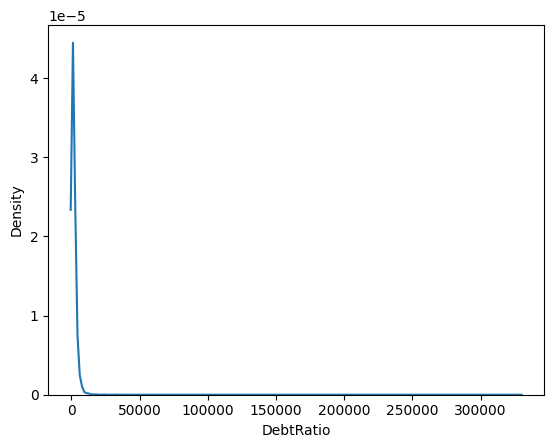

In [ ]:
sns.kdeplot(util_droped['DebtRatio'])

In [ ]:
util_droped['DebtRatio'].quantile([.975])

,DebtRatio
0.975,3438.0


In [ ]:
util_droped[util_droped['DebtRatio']>4000][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,5138.000000,5138.000000
mean,0.067341,0.003893
std,0.250637,0.062275
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [ ]:
temp=util_droped[(util_droped['DebtRatio'] > 4000) & (util_droped['SeriousDlqin2yrs'] == util_droped['MonthlyIncome'])].describe()

In [ ]:
dRatio = util_droped.drop(util_droped[(util_droped['DebtRatio'] > 4000) & (util_droped['SeriousDlqin2yrs'] == util_droped['MonthlyIncome'])].index)


In [ ]:
dRatio.groupby('SeriousDlqin2yrs').size()

,0
SeriousDlqin2yrs,
0,266266
1,19624


In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
model = XGBClassifier(tree_method='hist')

In [ ]:
x = dRatio.drop(['SeriousDlqin2yrs'], axis=1)
y = dRatio['SeriousDlqin2yrs']

In [ ]:
model.fit(x, y.values.ravel())
y_pred = model.predict(x)

In [ ]:
model.fit(x,y.values.ravel())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=model.predict(x)

In [ ]:
accuracy_score(y, y_pred)

0.9465668613802511

In [ ]:
cm =confusion_matrix(y, y_pred)

Text(50.722222222222214, 0.5, 'actuals')

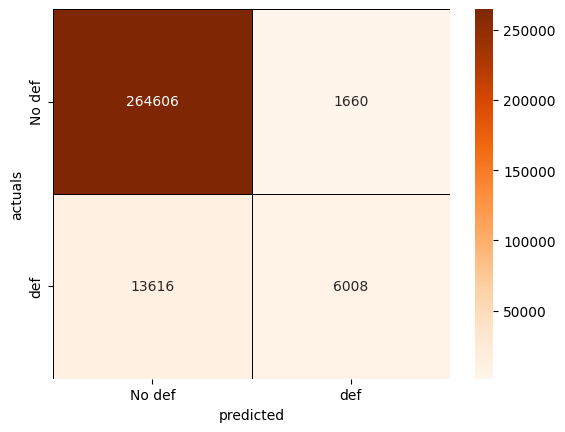

In [ ]:
sns.heatmap(cm,annot=True,fmt='d',cmap='Oranges',linewidths=0.5,linecolor='Black')
plt.xticks(np.arange(2)+.5,['No def','def'])
plt.yticks(np.arange(2)+.5,['No def','def'])
plt.xlabel("predicted")
plt.ylabel("actuals")

In [ ]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97    266266
           1       0.78      0.31      0.44     19624

    accuracy                           0.95    285890
   macro avg       0.87      0.65      0.71    285890
weighted avg       0.94      0.95      0.94    285890

